In [1]:
import xarray as xr

### open one wind file per model

In [5]:
ds_GERICS = xr.open_dataset("../data/GERICS/FOREST/raw_data/e062009t201512_wnd.nc", drop_variables=["FIB", "T", "V", "PS"]).squeeze()
ds_GERICS["FI"]

<xarray.DataArray 'FI' (time: 124, lev_2: 27, rlat: 121, rlon: 129)>
[52258932 values with dtype=float32]
Coordinates:
  * time     (time) float64 2.015e+07 2.015e+07 ... 2.015e+07 2.015e+07
  * rlon     (rlon) float64 -31.73 -31.29 -30.85 -30.41 ... 23.71 24.15 24.59
  * rlat     (rlat) float64 -26.73 -26.29 -25.85 -25.41 ... 25.19 25.63 26.07
  * lev_2    (lev_2) float64 1.0 2.0 3.0 4.0 5.0 ... 23.0 24.0 25.0 26.0 27.0
Attributes:
    long_name:     geopotential height
    units:         gpm
    code:          156
    table:         128
    grid_mapping:  rotated_pole

In [34]:
ds_GERICS["FI"].isel({"rlon":60, "rlat":60}).mean(dim="time")

<xarray.DataArray 'FI' (lev_2: 27)>
array([24547.818 , 20358.63  , 16120.804 , 14233.085 , 12964.087 ,
       12086.92  , 11254.966 , 10454.949 ,  9681.881 ,  8934.4795,
        8212.262 ,  7515.63  ,  6843.473 ,  6194.3667,  5568.6294,
        4966.618 ,  4387.7886,  3832.6296,  3302.1409,  2798.165 ,
        2323.04  ,  1880.4908,  1476.274 ,  1116.621 ,   810.4415,
         569.4425,   407.9059], dtype=float32)
Coordinates:
    rlon     float64 -5.33
    rlat     float64 -0.33
  * lev_2    (lev_2) float64 1.0 2.0 3.0 4.0 5.0 ... 23.0 24.0 25.0 26.0 27.0

GERICS model uses `lev_2` as a vertical wind coordinate and provides time varying geopotential height `FI` for each model level and location

In [19]:
ds_IDL = xr.open_dataset("../data/IDL/EVAL/ua/ua_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2015010100-2015123123.nc")

In [22]:
ds_IDL

<xarray.Dataset>
Dimensions:       (time: 8760, bnds: 2, rlat: 103, rlon: 106, mlev: 10)
Coordinates:
  * time          (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:00:00
  * rlon          (rlon) float64 -28.21 -27.77 -27.33 ... 17.11 17.55 17.99
  * rlat          (rlat) float64 -23.21 -22.77 -22.33 ... 20.79 21.23 21.67
Dimensions without coordinates: bnds, mlev
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 2015-01-01 ... 2016-01-01
    lon           (rlat, rlon) float64 -9.982 -9.58 -9.177 ... 62.74 63.58 64.41
    lat           (rlat, rlon) float64 22.2 22.36 22.52 ... 67.14 66.9 66.65
    rotated_pole  |S1 b''
    ua            (time, mlev, rlat, rlon) float32 ...
Attributes: (12/77)
    creation_date:                  2022-10-23-T04:31:37Z
    Conventions:                    CF-1.4
    contact:                        Rita Cardoso, rmcardoso@fc.ul.pt; Pedro S...
    experiment:                     Corine run with reanalysis forcing
    experiment_id:                  evaluation
    driving_experiment:             ECMWF-ERAINT, LUCAS_EVAL, r1i1p1
    ...                             ...
    num_land_cat:                   22
    iswater:                        17
    islake:                         21
    isice:                          15
    isurban:                        13
    isoilwater:                     14

In [29]:
ds_IDL.mlev

<xarray.DataArray 'mlev' (mlev: 10)>
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Dimensions without coordinates: mlev

In [35]:
ds_IDL_zg = xr.open_dataset("../data/IDL/EVAL/zg/zg_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2005010100-2005123123.nc")

In [40]:
ds_IDL_zg.isel(rlat=50,rlon=50)["zg"].mean(dim="time")

<xarray.DataArray 'zg' (mlev: 10)>
array([ 246.60217,  315.64963,  410.09134,  530.6453 ,  682.45746,
        875.4996 , 1111.9065 , 1354.6382 , 1586.1387 , 1822.9708 ],
      dtype=float32)
Coordinates:
    rlon     float64 -6.206
    rlat     float64 -1.207
Dimensions without coordinates: mlev

IDL provides `mlev` as vertical coordinate. Geopotential height `zg` stored in a different file.

In [23]:
ds_JLU = xr.open_dataset("../data/JLU/EVAL/U850p/U850p_2004010100-2004123118.nc")

In [24]:
ds_JLU

<xarray.Dataset>
Dimensions:       (time: 1464, pressure: 1, rlat: 109, rlon: 112)
Coordinates:
    lat           (rlat, rlon) float32 ...
    lon           (rlat, rlon) float32 ...
  * pressure      (pressure) float32 8.5e+04
  * rlat          (rlat) float32 -24.53 -24.09 -23.65 ... 22.11 22.55 22.99
  * rlon          (rlon) float32 -29.53 -29.09 -28.65 ... 18.43 18.87 19.31
  * time          (time) datetime64[ns] 2004-01-01 ... 2004-12-31T18:00:00
Data variables:
    U             (time, pressure, rlat, rlon) float32 ...
    rotated_pole  |S1 ...
Attributes: (12/22)
    title:                          CLMcom-CCLM5-0-9 model output prepared fo...
    institution:                    Chair of Environmental Meteorlogy, Brande...
    source:                         Climate Limited-area Modelling Community ...
    project_id:                     CORDEX
    experiment_id:                  LUCAS_Eval
    realization:                    5
    ...                             ...
    institute_id:                   BTU
    model_id:                       BTU-CCLM5-0-9
    rcm_version_id:                 v1
    CORDEX_domain:                  EUR-44
    product:                        output
    btu_run_id:                     FPSL01

JLU provides wind components at pressure levels 500hPa, 750hPa, 850hPa as well as at 10m. 

In [80]:
ds_OUR = xr.open_dataset("../data/OUR/EVAL/ua/ua_EUR44_ECMWF-ERAINT_LUCAS_EVAL_OUR_CRCM5_CLASS_3hr_20150101-20151231.nc")

In [81]:
ds_OUR

<xarray.Dataset>
Dimensions:       (rlat: 103, rlon: 106, plev: 6, time: 2920)
Coordinates:
    lat           (rlat, rlon) float64 ...
    lon           (rlat, rlon) float64 ...
  * plev          (plev) float64 1e+05 9.75e+04 9.5e+04 9.25e+04 9e+04 8.5e+04
  * rlat          (rlat) float64 -23.21 -22.77 -22.33 ... 20.79 21.23 21.67
  * rlon          (rlon) float64 -28.21 -27.77 -27.33 ... 17.11 17.55 17.99
  * time          (time) datetime64[ns] 2015-01-01 ... 2015-12-31T21:00:00
Data variables:
    rotated_pole  |S1 ...
    ua            (time, plev, rlat, rlon) float32 ...
Attributes: (12/21)
    Conventions:                    CF-1.6
    contact:                        giguere.michel@ouranos.ca
    comment:                        CRCM5 v3331 0.22 deg AMNO22d2 L56 S17-15m...
    creation_date:                  2020-08-04 
    experiment:                     simulation de reference 
    experiment_id:                  coe 
    ...                             ...
    ouranos_domain_name:            AMNO22d2 
    ouranos_run_id:                 coe OURALIB 1.5
    product:                        output
    reference:                      http://www.ouranos.ca
    history:                        Wed Dec 15 15:53:14 2021: ncks -O --chunk...
    NCO:                            netCDF Operators version 4.9.3 (Homepage ...

OUR provides wind components at pressure levels at 1000, 975, 950, 925, 900, 850 hPa

In [28]:
# ETH data still missing

### Approximate vertical grid spacing in meters

#### GERICS

In [82]:
ds_GERICS_FI = xr.open_dataset("../data/GERICS/GRASS/FI_interpolated/FI_2000.nc")
ds_GERICS_FIB = xr.open_dataset("../data/GERICS/GRASS/FIB/FIB_2000.nc")

In [83]:
ds_GERICS_FI.mean(dim="time")

<xarray.Dataset>
Dimensions:       (lev: 27, rlon: 129, rlat: 121)
Coordinates:
  * lev           (lev) float64 1.0 2.0 3.0 4.0 5.0 ... 23.0 24.0 25.0 26.0 27.0
  * rlon          (rlon) float64 -31.73 -31.29 -30.85 ... 23.71 24.15 24.59
  * rlat          (rlat) float64 -26.73 -26.29 -25.85 ... 25.19 25.63 26.07
Data variables:
    rotated_pole  (lev) float64 1.0 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    FI            (lev, rlat, rlon) float32 2.274e+04 2.271e+04 ... 57.98 64.56

In [84]:
ds_GERICS_FIB

<xarray.Dataset>
Dimensions:       (time: 1464, rlon: 129, rlat: 121)
Coordinates:
  * time          (time) float64 2e+07 2e+07 2e+07 2e+07 ... 2e+07 2e+07 2e+07
  * rlon          (rlon) float64 -31.73 -31.29 -30.85 ... 23.71 24.15 24.59
  * rlat          (rlat) float64 -26.73 -26.29 -25.85 ... 25.19 25.63 26.07
Data variables:
    rotated_pole  int32 ...
    FIB           (time, rlat, rlon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.6 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Wed Jan 11 16:16:54 2023: cdo selvar,FIB 2000/data_2000.nc ...
    source:       REMO
    institution:  Max Planck Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.6 (http://mpimet.mpg.de/...

In [85]:
ds_GERICS_height = ds_GERICS_FI.mean(dim="time")["FI"] - ds_GERICS_FIB.mean(dim="time")["FIB"]

In [21]:
ds_GERICS_height

<xarray.DataArray (lev_2: 27, rlat: 121, rlon: 129)>
array([[[24558.895   , 24658.254   , 24681.531   , ..., 24385.139   ,
         24148.994   , 23371.41    ],
        [24557.918   , 24517.436   , 24538.508   , ..., 23485.527   ,
         23239.986   , 23329.29    ],
        [24640.535   , 24571.385   , 24532.98    , ..., 23480.326   ,
         23607.812   , 23664.72    ],
        ...,
        [24770.07    , 24766.934   , 24763.814   , ..., 24547.486   ,
         24558.271   , 24572.324   ],
        [24768.021   , 24763.047   , 24758.334   , ..., 24554.299   ,
         24551.81    , 24569.346   ],
        [24766.94    , 24763.945   , 24755.549   , ..., 24562.76    ,
         24564.455   , 24558.998   ]],

       [[20118.125   , 20217.477   , 20239.879   , ..., 19940.705   ,
         19703.545   , 18926.012   ],
        [20117.133   , 20076.627   , 20096.781   , ..., 19041.072   ,
         18794.586   , 18883.846   ],
        [20198.268   , 20129.123   , 20090.113   , ..., 19034.41    ,
         19159.72    , 19216.594   ],
...
        [  219.56137 ,   219.57384 ,   219.45895 , ...,   213.54028 ,
           213.59799 ,   213.59924 ],
        [  219.45308 ,   219.46536 ,   219.38591 , ...,   213.39322 ,
           213.33977 ,   213.34523 ],
        [  219.43332 ,   219.43883 ,   219.3591  , ...,   213.37238 ,
           213.32108 ,   213.3312  ]],

       [[   67.95859 ,    67.95892 ,    68.069   , ...,    65.614624,
            64.951904,    64.96582 ],
        [   67.96338 ,    67.94879 ,    68.06537 , ...,    65.61084 ,
            64.934204,    64.96875 ],
        [   68.18927 ,    68.17804 ,    68.21521 , ...,    66.87073 ,
            66.86499 ,    66.83533 ],
        ...,
        [   62.221878,    62.226353,    62.18576 , ...,    60.31903 ,
            60.323357,    60.3194  ],
        [   62.1906  ,    62.195175,    62.166363, ...,    60.26231 ,
            60.243656,    60.240807],
        [   62.185173,    62.186523,    62.1578  , ...,    60.24862 ,
            60.230736,    60.23295 ]]], dtype=float32)
Coordinates:
  * rlon     (rlon) float64 -31.73 -31.29 -30.85 -30.41 ... 23.71 24.15 24.59
  * rlat     (rlat) float64 -26.73 -26.29 -25.85 -25.41 ... 25.19 25.63 26.07
  * lev_2    (lev_2) float64 1.0 2.0 3.0 4.0 5.0 ... 23.0 24.0 25.0 26.0 27.0

In [13]:
import matplotlib.pyplot as plt

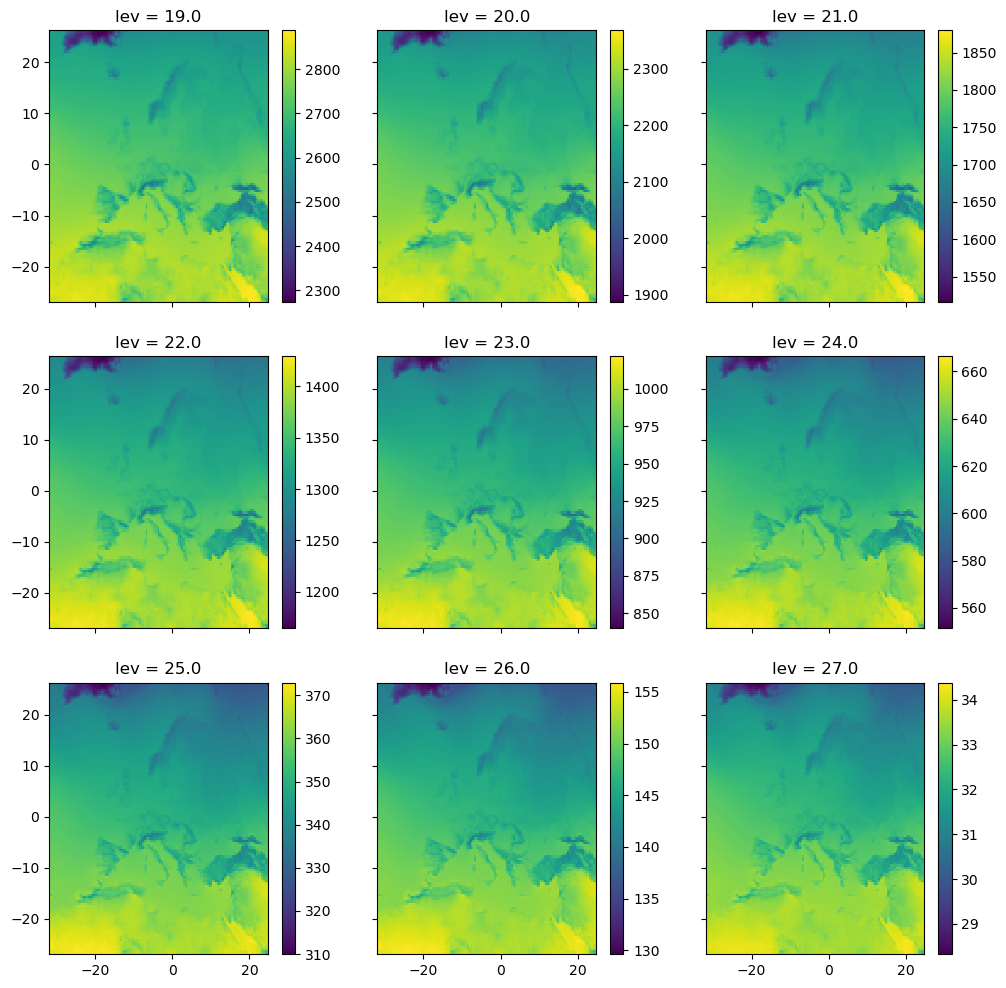

In [87]:
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(19,28)):
    ds_tmp = ds_GERICS_height.sel({"lev": lev_2})
    ds_tmp.plot(ax=axs.flatten()[i])
    axs.flatten()[i].set(xlabel="", ylabel="")

looks like the same pattern but with scaled values

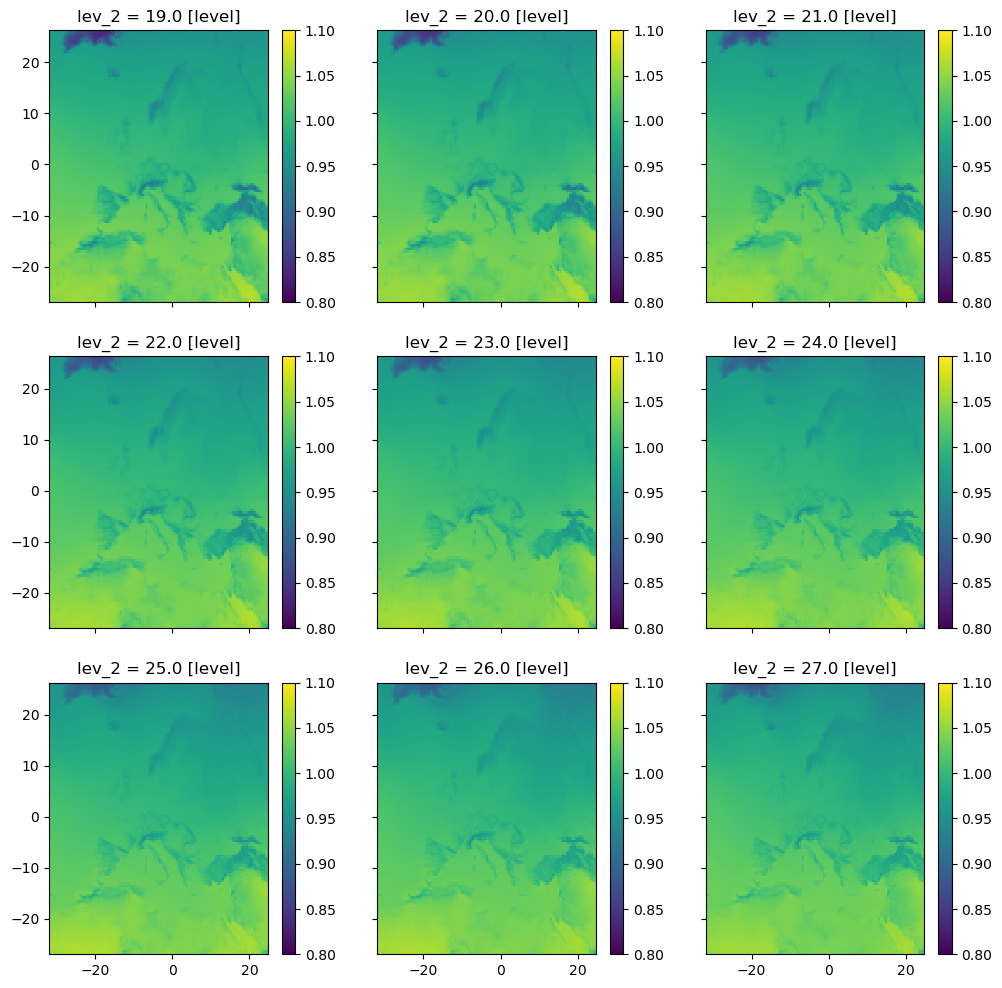

In [28]:
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(19,28)):
    ds_tmp = ds_GERICS_height.sel({"lev_2": lev_2})
    ds_tmp /= ds_tmp.mean()
    ds_tmp.plot(ax=axs.flatten()[i], vmin=0.80, vmax=1.1)
    axs.flatten()[i].set(xlabel="", ylabel="")

#### IDL

In [30]:
ds_IDL_zg = xr.open_dataset("../data/IDL/EVAL/zg/zg_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_1hr_2000010100-2000123123.nc")
ds_IDL_oro = xr.open_dataset("../data/IDL/orog_EUR-44_ECMWF-ERAINT_LUCAS_EVAL_r1i1p1_IDL_WRFV381D_v1_fx.nc")

In [74]:
# coordinates are off by a rounding error. Corrected here
import numpy as np
for ds_tmp in [ds_IDL_zg, ds_IDL_oro]:
    for rdim in ["rlat", "rlon"]:
        ds_tmp[rdim] = np.round(a[rdim], 3)

In [71]:
ds_IDL_height = ds_IDL_zg["zg"].mean(dim="time") - ds_IDL_oro["orog"].drop(["lon", "lat"])

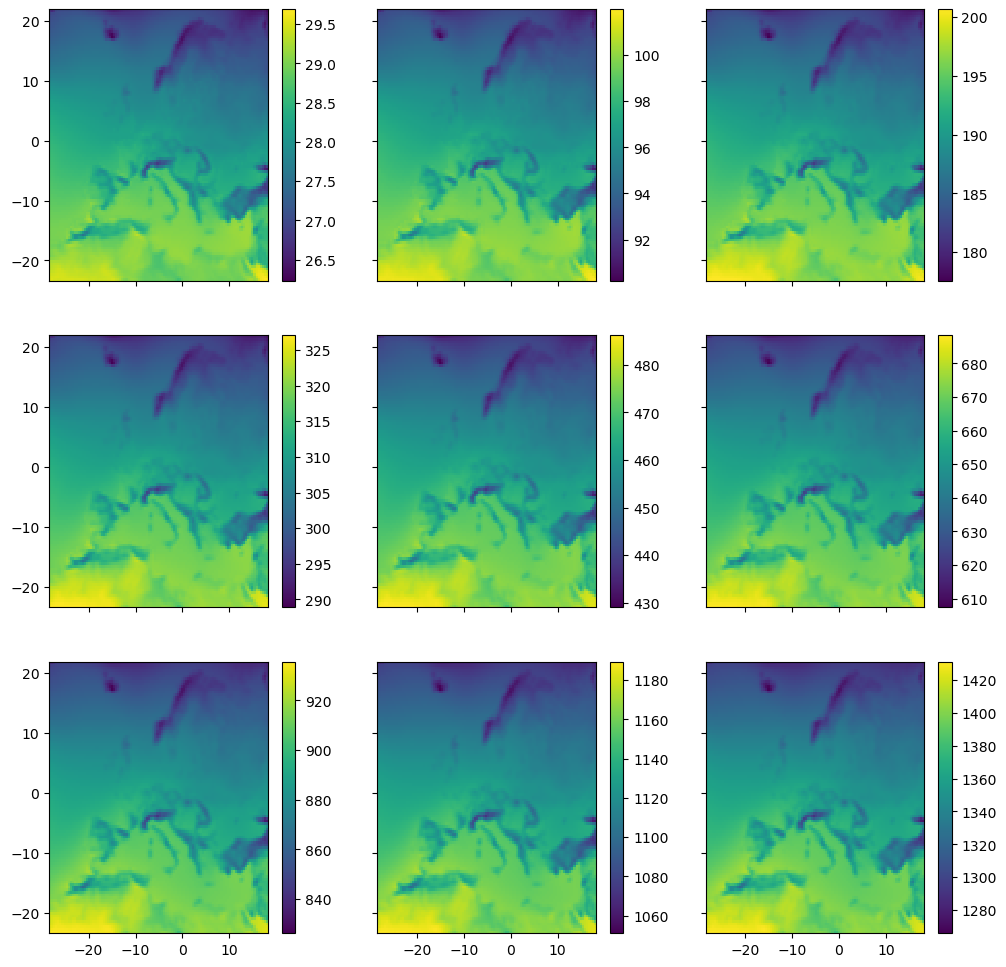

In [77]:
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(9)):
    ds_tmp = ds_IDL_height.sel({"mlev": lev_2})
    ds_tmp.plot(ax=axs.flatten()[i])
    axs.flatten()[i].set(xlabel="", ylabel="")

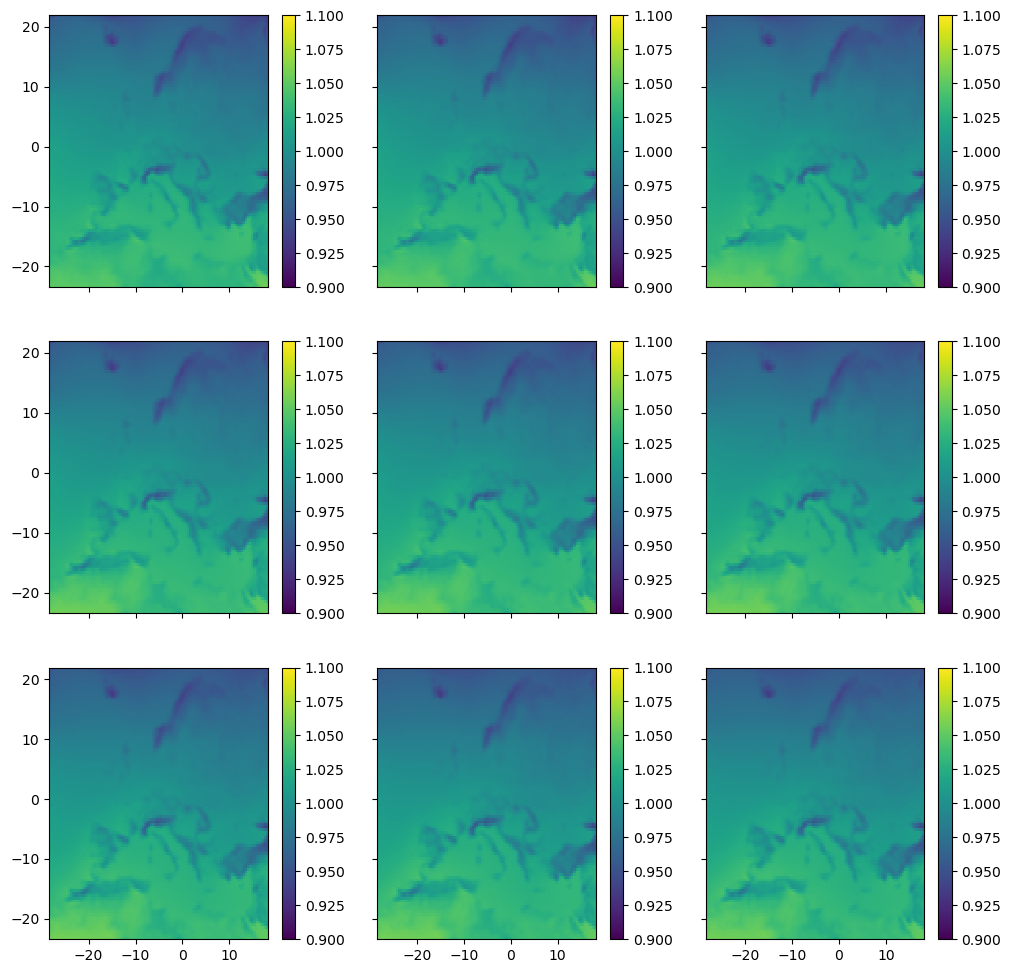

In [79]:
# Again scaled
f, axs = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(12, 12))
for i, lev_2 in enumerate(range(9)):
    ds_tmp = ds_IDL_height.sel({"mlev": lev_2})
    ds_tmp /= ds_tmp.mean()
    ds_tmp.plot(ax=axs.flatten()[i], vmin=0.9, vmax=1.1)
    axs.flatten()[i].set(xlabel="", ylabel="")

One over orography

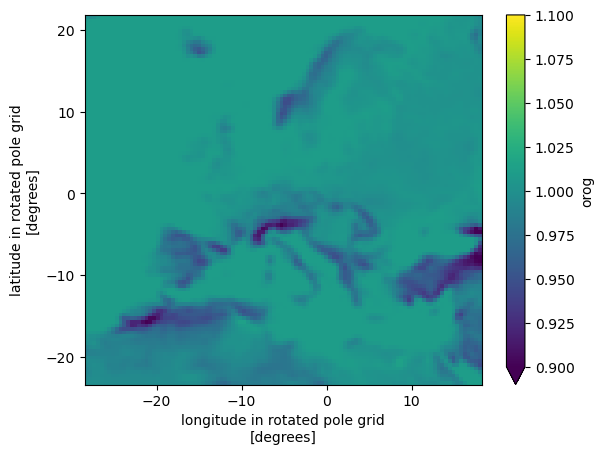

In [117]:
proxy = 20000-ds_IDL_oro["orog"]  # roughly air column height
proxy /= proxy.mean()   # normalize
proxy.plot(vmin=0.9, vmax=1.1)